In [6]:
# ================================================================================
# Splitting training and test sets
# ================================================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(r'C:\Users\kaspe\OneDrive\Documents\USYD-Kasper\Year 2\QBUS2810\Group Project\WAGE2_2025_abridged.csv')

state= (540491669 + 540712391 + 540575497 + 540750669 + 540744934)   # replace this number with the sum of the student IDs for the members of your group

train = data.sample(frac=0.8, random_state=state)
test = data[data.index.isin(train.index)==False].copy() # Only for prediction

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)



In [7]:
train.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,1160,40,92,32,12,8,8,31,1,0,0,0,4,1.0,12.0,11.0,7.056175
1,722,55,113,36,16,8,1,38,0,0,1,1,1,2.0,8.0,NaN,6.582025
2,1160,40,84,35,12,17,2,38,1,0,0,0,4,2.0,16.0,12.0,7.056175
3,1000,50,104,36,16,11,8,30,1,0,0,1,1,1.0,12.0,11.0,6.907755
4,978,48,104,36,12,19,15,36,1,0,0,1,5,6.0,6.0,NaN,6.885510


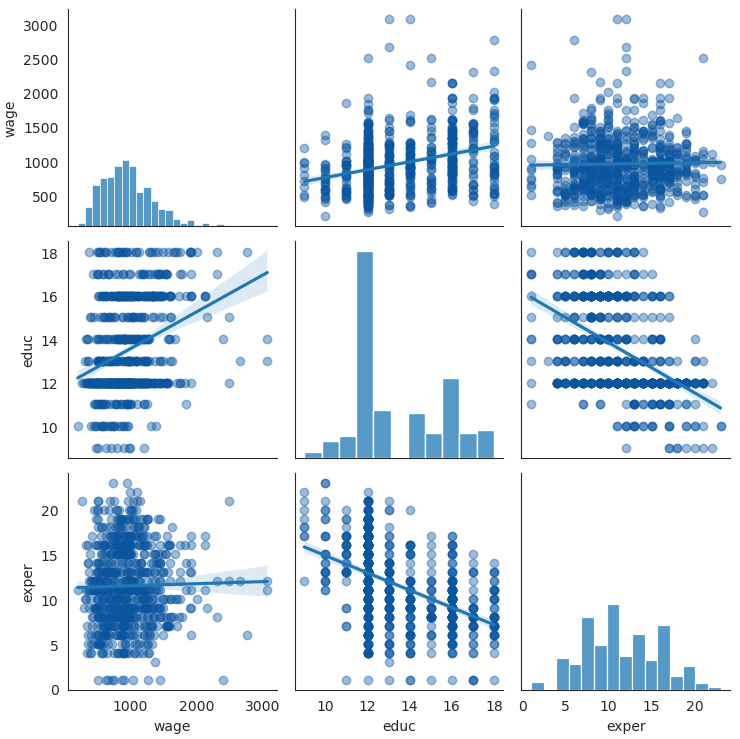

In [8]:
variables=['wage', 'educ', 'exper']
with sns.axes_style('white'):
    g=sns.pairplot(train[variables], kind='reg',
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

In [9]:
model = smf.ols('wage ~ educ', data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     78.11
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           7.21e-18
Time:                        12:31:25   Log-Likelihood:                -5399.0
No. Observations:                 733   AIC:                         1.080e+04
Df Residuals:                     731   BIC:                         1.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.8699     88.719      2.129      0.0

In [10]:
model.mse_resid**0.5

382.9892680116289

In [11]:
model = smf.ols('wage ~ exper', data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3188
Date:                Wed, 30 Apr 2025   Prob (F-statistic):              0.572
Time:                        12:31:25   Log-Likelihood:                -5436.0
No. Observations:                 733   AIC:                         1.088e+04
Df Residuals:                     731   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    941.2470     41.168     22.863      0.0

In [12]:
model.mse_resid**0.5

402.84328849369126

In [13]:
print(train[['educ', 'exper']].corr())

           educ     exper
educ   1.000000 -0.472214
exper -0.472214  1.000000


In [14]:
model = smf.ols('wage ~ educ + exper', data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     55.84
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.72e-23
Time:                        12:31:25   Log-Likelihood:                -5384.0
No. Observations:                 733   AIC:                         1.077e+04
Df Residuals:                     730   BIC:                         1.079e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -288.7780    122.739     -2.353      0.0

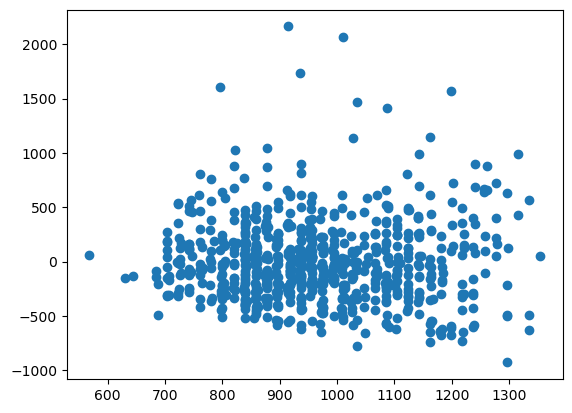

In [16]:
#residuals vs. fitted values 
resid = model.resid
fit = model.fittedvalues
plt.scatter(fit, resid)
plt.show()


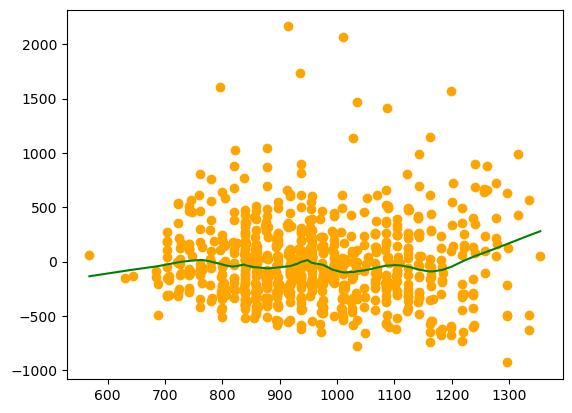

In [17]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
plt.scatter(fit,resid, color='orange')
z1 = lowess(resid, fit, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'green')
plt.show()

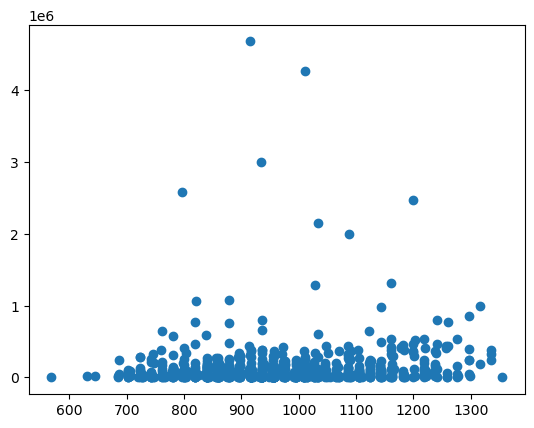

In [23]:
#visual diagnostic for heteroskedasticity
resid2=model.resid**2
plt.scatter(fit,resid2)
plt.show()

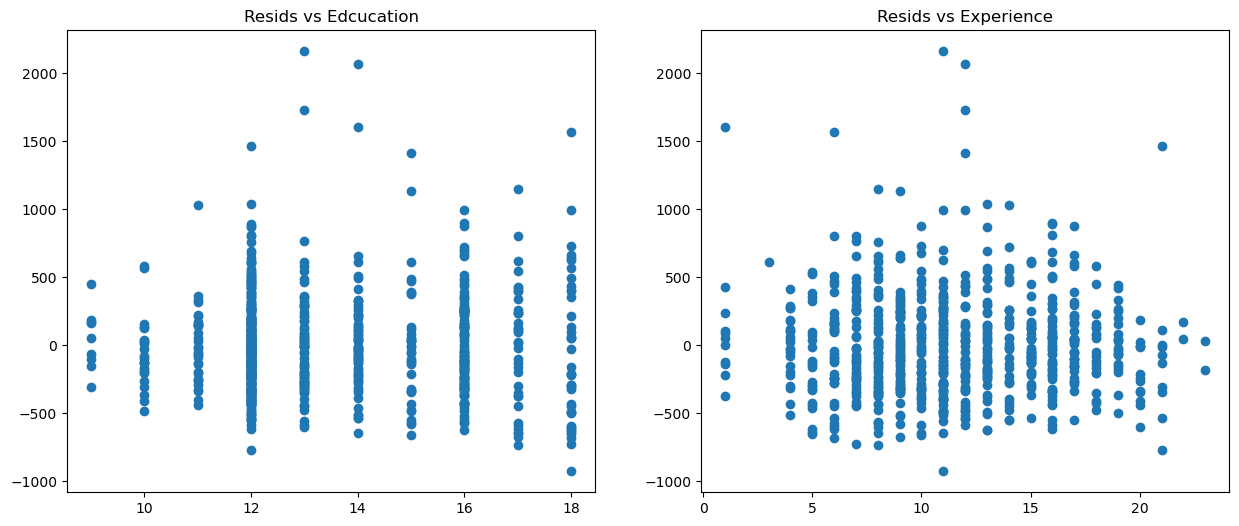

In [19]:
#Residuals vs Variables
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(train['educ'],resid)
ax1.set_title("Resids vs Edcucation")
ax2.scatter(train['exper'], resid)
ax2.set_title("Resids vs Experience")
plt.show()

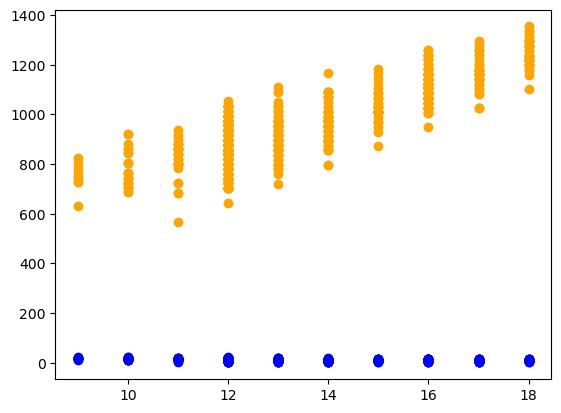

In [21]:
#Residuals vs fitted values
plt.scatter(train['educ'], train['exper'], c='blue')
plt.scatter(train['educ'], fit, c='orange')
plt.show()